![Banner](img/banner.png)

# **Actividad No.3:** Desigualdades Probabilísticas

***Matemáticas para Machine Learning***.

**Semana 4 - Lección 3:** Regresión lineal y distribuciones de probabilidad.

**Profesor:** *Fernando Lozano* - **Autor Notebook:** *Sergio David Salazar Isairias*

# Introducción

## Descripción

El presente *jupyter notebook* contiene todo el material para el desarrollo de la Actividad 3 de la semana 4 del curso ***Matemáticas para Machine Learning***, correspondiente a la lección 3: Distribuciones de probabilidad. En este se utilizará el conocimiento adquirido sobre desigualdades probabilisticas para analizar distribuciones de probabilidad.

**Objetivos de Aprendizaje:**

*   Utilizar desigualdades de probabilisticas para identificar diferencias entre distribuciones de probabilidad.

## Metodología

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas líneas de comentarios. Dentro de estos comentarios encontrará indicaciones de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o esten solo igualadas a None, complete la asignación).

# Teoría

En la práctica identificar la distribución de densidad de probabilidad de una serie de datos requiere de pruebas de bondad de ajuste, así como métodos empíricos, sin olvidar la etapa de preprocesamiento de los datos. Es decir, reconocer la distribución de probabilidad de un conjunto de datos no es una tarea sencilla. Es por ello que las desigualdades probabilisticas son de gran importancia, ya que pemiten acotar la probabilidad de ocurrencia de una evento en particular, independiente de la distribución de probabilidad.

**Desigualdad de Markov**

Sea $\mathbf{X \geq 0}$ y $\mathbf{t} > 0$ un número real. La desigualdad de *Markov* establece una cota superior para la probabilidad de que una cantidad no negativa $\mathbf{X}$ sea mayor a una constante positiva $t$.

$$P(X \geq t) \leq \frac{E[X]}{t}$$

**Desigualdad de Chernoff (Hoeffding)**

La desigualdad de *Hoeffding* establece una cota para la diferencia entre el valor esperado de una distribución de probabilidad y su estimador. Sea $\mathbf{X}$ una variable aleatoria y $\mathbf{\epsilon} > 0$ un número real, se tiene la siguiente desigualdad.

$$P(|E[X] - \bar{X}| \geq \epsilon) \leq 2e^{-2\epsilon^{2}n}$$

# Inicialización

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import norm

import numpy as np
import pandas as pd
import random
import math
import sys

In [2]:
# UTILIDADES =================================
from maiautils import MaiaUtils
mutils = MaiaUtils(get_ipython()) 
# ============================================

In [3]:
# Cambiar configuración de informe de errores
mutils.toggle_traceback()

## Datos

Para el desarrollo de la presente actividad se dispone de los datos del archivo "*datos_monedas.csv*". La serie de contiene la cantidad *caras* obtenidas en $30$ lanzamientos, para $3$ monedas diferentes. El experimento se realizo en $100000$ intentos.             

In [4]:
df = pd.read_csv("dataset/datos_monedas.csv")
df.head()

,Moneda 1,Moneda 2,Moneda 3
0,9,15,25
1,5,13,26
2,14,20,26
3,9,19,26
4,14,12,29


# Distribución de los datos

Dado el contexto se identifica que la probabilidad de "sacar cara" en un lanzamiento sigue una distribución binomial. Ahora bien, dada la cantidad de datos es posible estimar los parámetros de dicha distribución, lo cual no es de interés en la presente actividad. En su lugar, se aproximaran los datos a una distribución normal.

## Batch 100 datos

En primer lugar, se toma una muestra aleatoría de $100$ datos de los datos **Moneda 1**.

In [9]:
random.seed(10)
n = 100
x = np.random.randint(low=0,high=df.shape[0],size=n)
p_muestral = np.sum(df["Moneda 1"][x])/(30*n)

In [10]:
media_muestral_100 = 30*p_muestral
desviacion_muestral_100 = np.sqrt(30*p_muestral*(1-p_muestral))

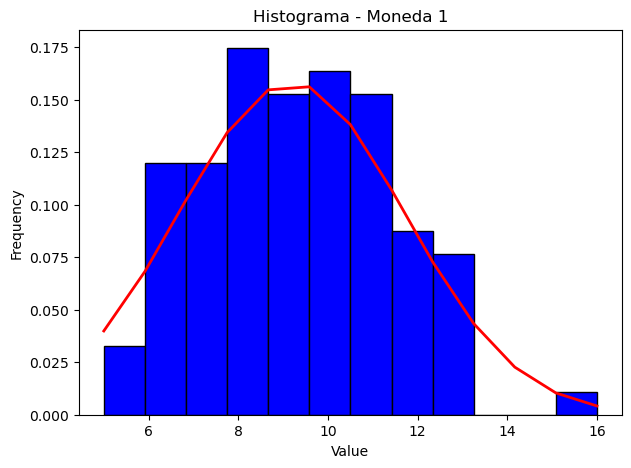

In [11]:
fig = plt.figure(figsize = (7,5)) 
count, bins, ignored = plt.hist(x=df["Moneda 1"][x], bins=12,density=True,edgecolor='black',color='b')
plt.plot(bins, norm.pdf(bins, media_muestral_100, desviacion_muestral_100), color='r', lw=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma - Moneda 1')
plt.show()

## Batch 1000 datos

In [12]:
n = 1000
x = np.random.randint(low=0,high=df.shape[0],size=n)
p_muestral = np.sum(df["Moneda 1"][x])/(30*n)

In [13]:
media_muestral_1000 = 30*p_muestral
desviacion_muestral_1000 = np.sqrt(30*p_muestral*(1-p_muestral))

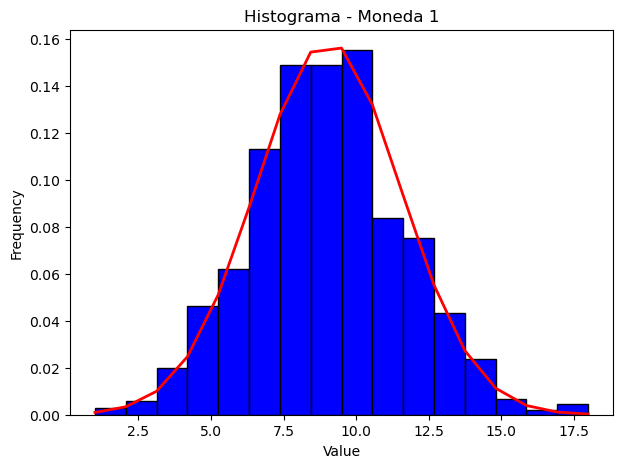

In [14]:
fig = plt.figure(figsize = (7, 5)) 
count, bins, ignored = plt.hist(x=df["Moneda 1"][x], bins=16,density=True,edgecolor='black',color='b')
plt.plot(bins, norm.pdf(bins, media_muestral_1000, desviacion_muestral_1000), color='r', lw=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma - Moneda 1')
plt.show()

## Batch 10000 datos

In [15]:
n = 10000
x = np.random.randint(low=0,high=df.shape[0],size=n)
p_muestral = np.sum(df["Moneda 1"][x])/(30*n)

In [16]:
media_muestral_10000 = 30*p_muestral
desviacion_muestral_10000 = np.sqrt(30*p_muestral*(1-p_muestral))

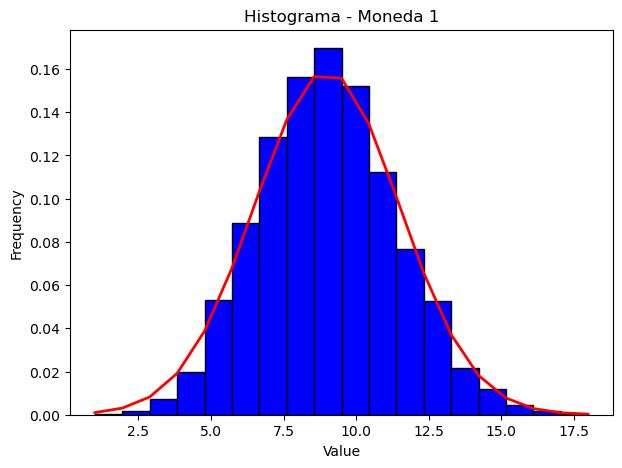

In [17]:
fig = plt.figure(figsize = (7, 5)) 
count, bins, ignored = plt.hist(x=df["Moneda 1"][x], bins=18,density=True,edgecolor='black',color='b')
plt.plot(bins, norm.pdf(bins, media_muestral_10000, desviacion_muestral_10000), color='r', lw=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma - Moneda 1')
plt.show()

## Batch 100000 datos

In [18]:
n = 100000
p_muestral = np.sum(df["Moneda 1"])/(30*n)

In [19]:
ps = []
ps.append(p_muestral)

In [20]:
media_muestral_1 = 30*p_muestral
desviacion_muestral_1 = np.sqrt(30*p_muestral*(1-p_muestral))

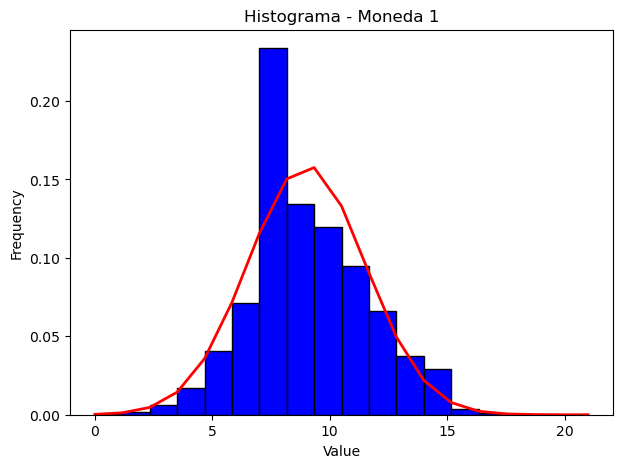

In [21]:
fig = plt.figure(figsize = (7, 5)) 
count, bins, ignored = plt.hist(x=df["Moneda 1"], bins=18,density=True,edgecolor='black',color='b')
plt.plot(bins, norm.pdf(bins, media_muestral_1, desviacion_muestral_1), color='r', lw=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma - Moneda 1')
plt.show()

## Comparación

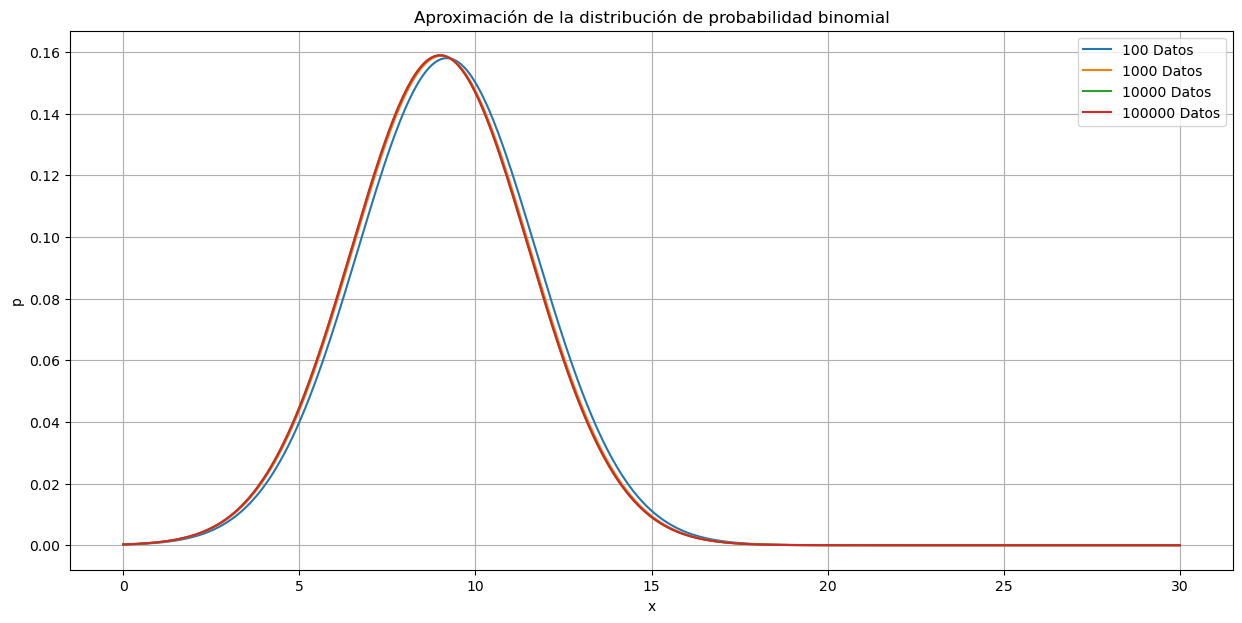

In [22]:
# Rango
x = np.linspace(0, 30, 500)

# Funciones Normales
norm_1 = norm.pdf(x, media_muestral_100, desviacion_muestral_100)
norm_2 = norm.pdf(x, media_muestral_1000, desviacion_muestral_1000)
norm_3 = norm.pdf(x, media_muestral_10000, desviacion_muestral_10000)
norm_4 = norm.pdf(x, media_muestral_1, desviacion_muestral_1)

# Grafica
fig = plt.figure(figsize = (15, 7)) 

# Funciones
plt.plot(x, norm_1, label='100 Datos')
plt.plot(x, norm_2, label='1000 Datos')
plt.plot(x, norm_3, label='10000 Datos')
plt.plot(x, norm_4, label='100000 Datos')

# Medias
#plt.vlines(x=[media_muestral_100, media_muestral_1000, media_muestral_10000,media_muestral_100000], 
           #ymin=0, ymax=[max(norm_1), max(norm_2), max(norm_3),max(norm_4)],
           #colors=['blue', 'yellow', 'green','orange'], ls='--', lw=1.5)

# Layout
plt.title('Aproximación de la distribución de probabilidad binomial')
plt.xlabel('x')
plt.ylabel('p')
plt.grid(True)
plt.legend()
plt.show()

Note que a medida que la cantidad de datos aumenta la distribución de probabilidad tiende a la misma forma, i.e. los parámetros estimados convergen a un valor cercano al parámetro poblacional $\mathbf{p}$.

## Moneda 2

In [23]:
n = 100000
p_muestral = np.sum(df["Moneda 2"])/(30*n)
ps.append(p_muestral)

In [24]:
media_muestral_2= 30*p_muestral
desviacion_muestral_2 = np.sqrt(30*p_muestral*(1-p_muestral))

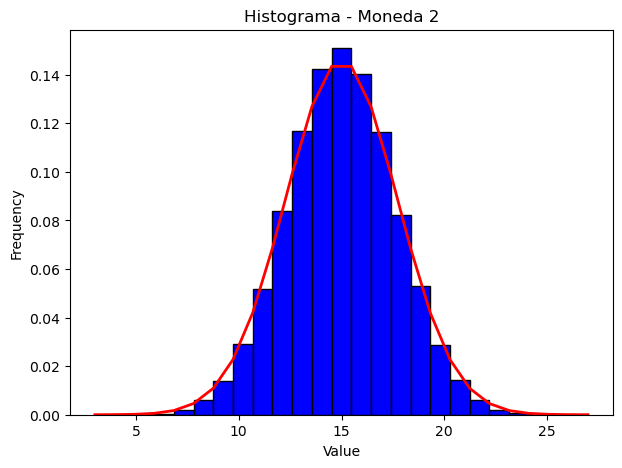

In [25]:
fig = plt.figure(figsize = (7, 5)) 
count, bins, ignored = plt.hist(x=df["Moneda 2"], bins=25,density=True,edgecolor='black',color='b')
plt.plot(bins, norm.pdf(bins, media_muestral_2, desviacion_muestral_2), color='r', lw=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma - Moneda 2')
plt.show()

## Moneda 3

In [26]:
n = 100000
p_muestral = np.sum(df["Moneda 3"])/(30*n)
ps.append(p_muestral)

In [27]:
media_muestral_3= 30*p_muestral
desviacion_muestral_3 = np.sqrt(30*p_muestral*(1-p_muestral))

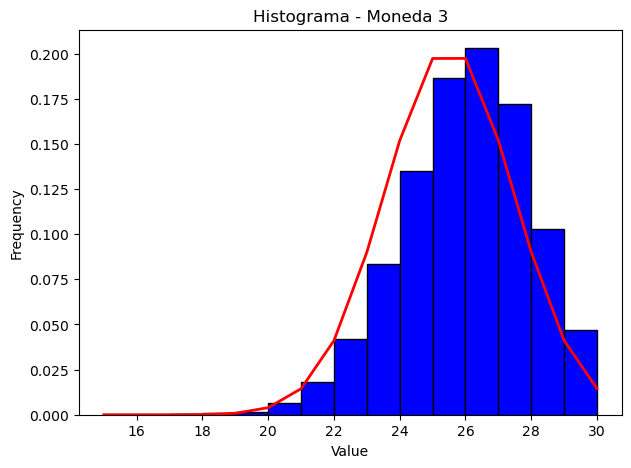

In [28]:
fig = plt.figure(figsize = (7, 5)) 
count, bins, ignored = plt.hist(x=df["Moneda 3"], bins=15,density=True,edgecolor='black',color='b')
plt.plot(bins, norm.pdf(bins, media_muestral_3, desviacion_muestral_3), color='r', lw=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma - Moneda 3')
plt.show()

## Comparación de las aproximaciones

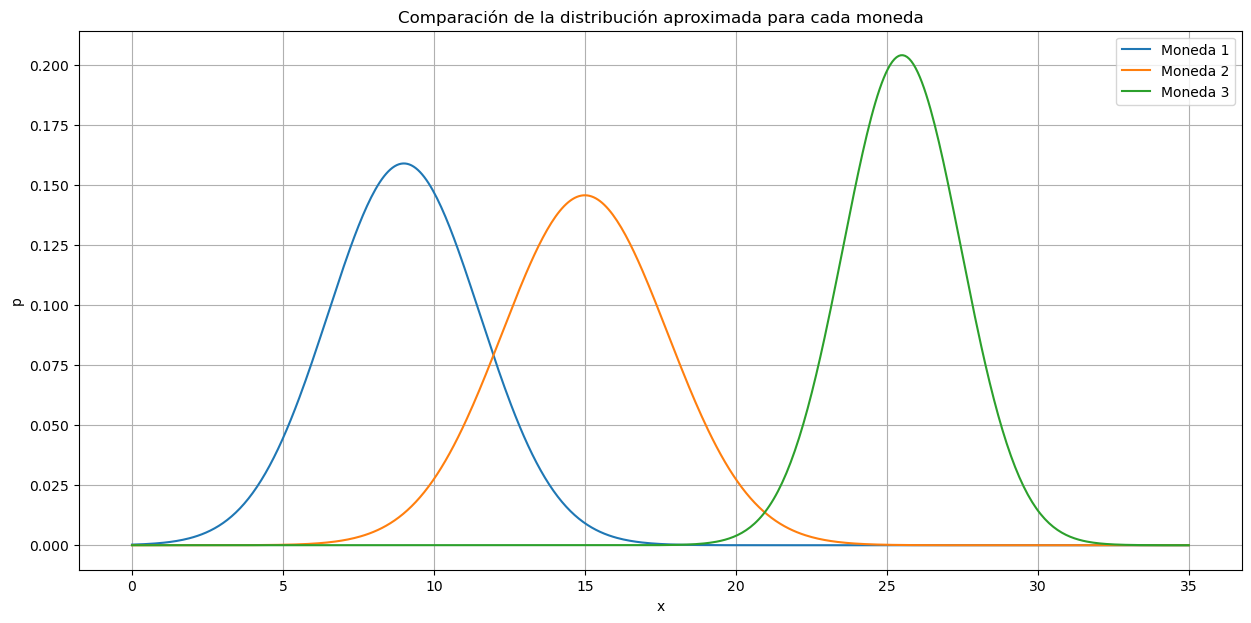

In [29]:
# Rango
x = np.linspace(0, 35, 500)

# Funciones Normales
norm_1 = norm.pdf(x, media_muestral_1, desviacion_muestral_1)
norm_2 = norm.pdf(x, media_muestral_2, desviacion_muestral_2)
norm_3 = norm.pdf(x, media_muestral_3, desviacion_muestral_3)

# Grafica
fig = plt.figure(figsize = (15, 7)) 

# Funciones
plt.plot(x, norm_1, label='Moneda 1')
plt.plot(x, norm_2, label='Moneda 2')
plt.plot(x, norm_3, label='Moneda 3')

# Layout
plt.title('Comparación de la distribución aproximada para cada moneda')
plt.xlabel('x')
plt.ylabel('p')
plt.grid(True)
plt.legend()
plt.show()

Las distribuciones de probabilidad difieren en su centro y en su ancho ¿a qué se  puede deber dicho fenómeno?

# Desigualdades probabilísticas

Según lo visto en clase la probabilidad de que al lanzar una moneda justa $n$ veces
más del $80%$ por ciento de las veces caiga en cara es menor o igual a $0.625$. Compruébese dicha desigualdad con la serie de datos.

In [30]:
print("Probabilidad de que más del 80% de las veces caiga en cara")
for i in range(3):    
    pr= str(sum(df["Moneda "+str(i+1)] >= 0.8*30 )/100000)
    print("Moneda "+ str(i+1)+ ": " +pr)

Probabilidad de que más del 80% de las veces caiga en cara
Moneda 1: 0.0
Moneda 2: 0.00083
Moneda 3: 0.84702


In [31]:
print("Probabilidad de exito muestral")
for i in range(3):
    print("Moneda "+str(i+1)+": " + str(ps[i]))

Probabilidad de exito muestral
Moneda 1: 0.300123
Moneda 2: 0.499923
Moneda 3: 0.8500306666666667


La probabilidad empírica de las monedas $1$ y $2$ cumple con la cota de Chernoff, pero, ¿por qué no se cumple para la moneda 3? Según la probabilidad muestral estimada, la probabilidad de éxito de la moneda 3 es $\approx 0.85$, lo cual difiere del $0.5$ de una moneda balanceada, por lo que la cota de $0.625$ no aplica.

Encuentre una cota apropiada para la moneda $3$, para ello complete la siguiente función.

In [32]:
def cota_markov(q,p):
    """ 
    Retorna la cota de Markov para la probabilidad de obtener
    cara más de q por ciento para una moneda con probabilidad de exito p,
    para n experimentos.
    ___________________________________
    Entrada:
    q: [float] Porcentaje de los intentos que se desea, sean cara.
    p: [float] Probabilidad de exito de la moneda .
    ___________________________________
    Salida:
    cota: [float] Cota de Markov para la probabilidad descrita.
    """  
    # ==============================================================
    # COMPLETAR ====================================================
    # - 
    # Reemplace 0 por la expresión correcta para la cota de Markov.
    cota = p/q
    # ==============================================================
    return cota

In [33]:
cota_markov(0.8,0.85)

1.0625

In [34]:
mutils.calificar_cota_markov(cota_markov)

In [35]:
cotas = [cota_markov(0.8,ps[i]) for i in range(3)]

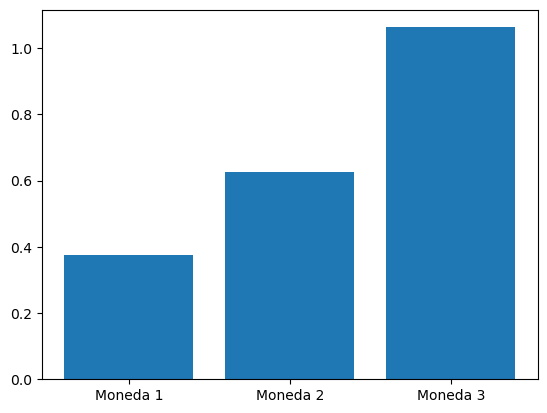

In [36]:
plt.bar(["Moneda 1","Moneda 2","Moneda 3"],cotas)
plt.show()

Ahora, se desea realizar un clasificador que permita distinguir entre los datos de la moneda 1 y la moneda 2. Dado el costo computacional no se utilizaran todos los datos. De modo que se estimara la cantidad de datos necesaria por medio de la cota de Chernof. Siendo la cantidad óptima a aquella que garantice que la probabilidad empírica del error del clasificador no difiera en más de $\epsilon$ de la probabilidad real. Para ello complete la siguiente función.

In [38]:
def cota_chernof(delta,epsilon):
    """ 
    Retorna la cantidad mínima de datos que garantiza una diferencia como máximo de 
    epsilon entre p muestral y p poblacional, con confianza de 1-delta.
    ___________________________________
    Entrada:
    epsilon: [float] Precisión. Máxima diferencia entre p muestral y p poblacional.
    delta: [float] Significancia.
    ___________________________________
    Salida:
    n: [float] Cota de Markov para la probabilidad descrita.
    """  
    
    # ==============================================================
    # COMPLETAR ====================================================
    # - 
    # Reemplace 0 por la expresión correcta para n.
    # AYUDA: Utilice la cota de chernof.
    n = np.log(2/delta)/(2*epsilon*epsilon)
    # ==============================================================
    
    # Redondear al entero superior, i.e. función techo,
    n = np.ceil(n)
    return n

In [39]:
cota_chernof(0.05,0.04)

1153.0

In [40]:
mutils.calificar_cota_chernof(cota_chernof)

In [41]:
ep = 0.05
deltas = np.linspace(0.001,0.1,100)
l = []
for i in deltas:
    l.append(cota_chernof(ep,i))

In [42]:
c = [1-i for i in deltas]

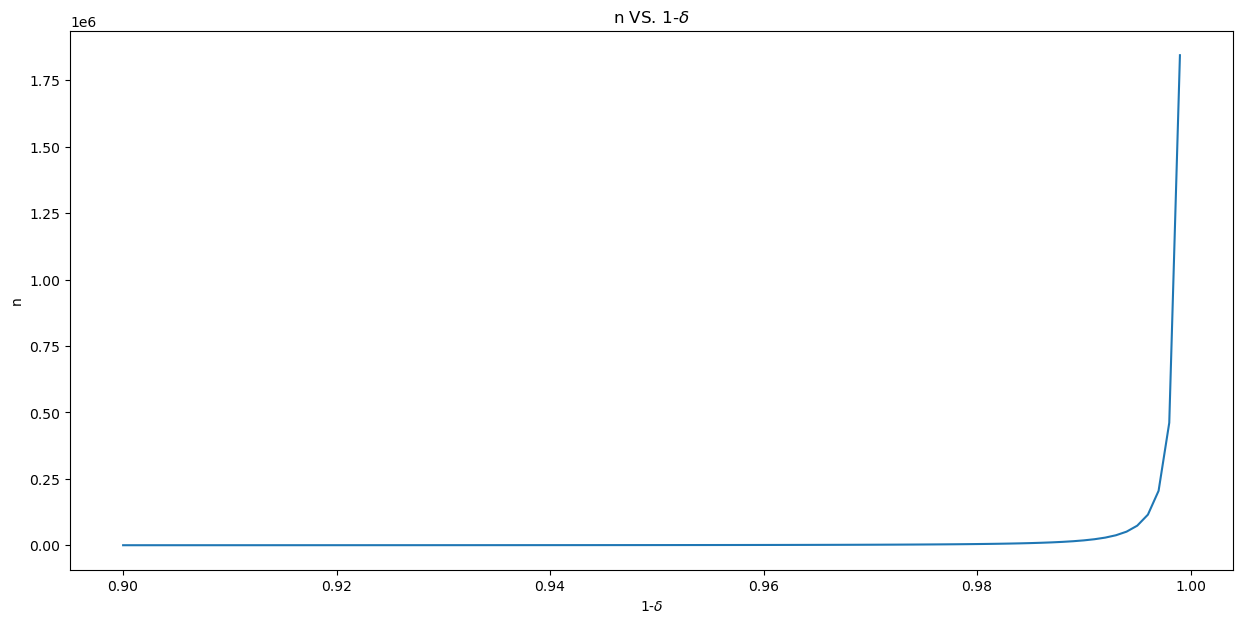

In [43]:
# Grafica
fig = plt.figure(figsize = (15, 7)) 

plt.plot(c[::-1],l[::-1])

plt.title("n VS. 1-$\delta$")
plt.xlabel("1-$\delta$")
plt.ylabel("n")
plt.show()